<a href="https://colab.research.google.com/github/Mohammmedsaqib/Neural-Networks-And-Fuzzy-Logic/blob/main/EXPERIMENT_1_1144.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

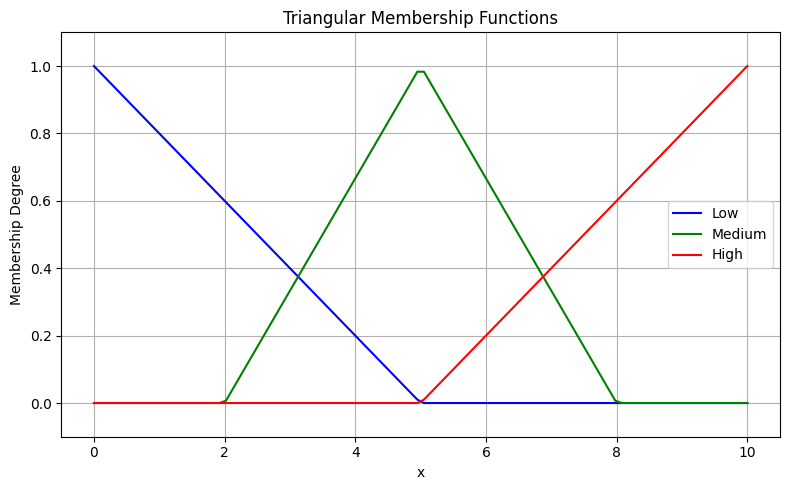

In [1]:
# triangular_fuzzy_set.py
import numpy as np
import matplotlib.pyplot as plt
# Triangular membership function
def triangular(x, a, b, c):
    # Handle the case where a == b or c == b to avoid division by zero
    if a == b and b == c:
        return np.where(x == b, 1.0, 0.0) # A single point at the peak
    elif a == b:
        # Linear function from b to c
        return np.maximum(np.minimum(1.0, (c - x) / (c - b)), 0)
    elif c == b:
        # Linear function from a to b
        return np.maximum(np.minimum((x - a) / (b - a), 1.0), 0)
    else:
        return np.maximum(np.minimum((x - a)/(b - a), (c - x)/(c - b)), 0)
# Define the universe of discourse
x = np.linspace(0, 10, 100)
# Define three triangular fuzzy sets: Low, Medium, High
low = triangular(x, 0, 0, 5) # Triangle peak at 0, ends at 5
medium = triangular(x, 2, 5, 8) # Triangle peak at 5, spans from 2 to 8
high = triangular(x, 5, 10, 10) # Triangle peak at 10, starts from 5
# Plot the fuzzy sets
plt.figure(figsize=(8, 5))
plt.plot(x, low, label='Low', color='blue')
plt.plot(x, medium, label='Medium', color='green')
plt.plot(x, high, label='High', color='red')
plt.title('Triangular Membership Functions')
plt.xlabel('x')
plt.ylabel('Membership Degree')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Temperature = 28°C
Membership in Cold: 0.00
Membership in Warm: 0.70
Membership in Hot : 0.00


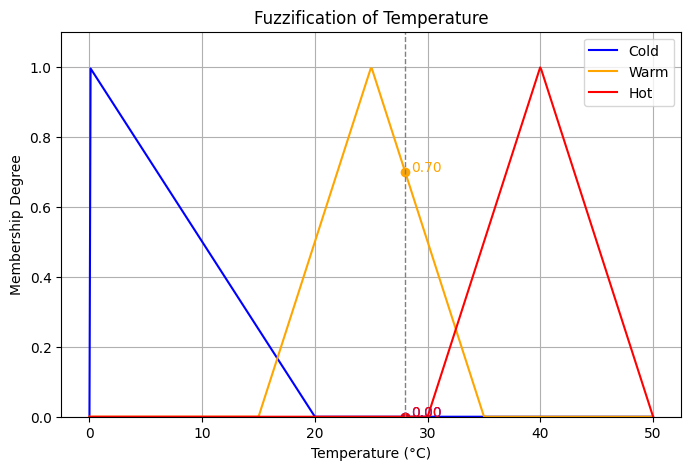

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Triangular membership function ---
def triangular_mf(x, a, b, c):
    if x <= a or x >= c:
        return 0.0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x < c:
        return (c - x) / (c - b)
    elif x == b:
        return 1.0

# --- Parameters for fuzzy sets ---
# Cold: peak at 0°C, spans from 0 to 20°C
# Warm: peak at 25°C, spans from 15 to 35°C
# Hot : peak at 40°C, spans from 30 to 50°C
cold_params = (0, 0, 20)
warm_params = (15, 25, 35)
hot_params  = (30, 40, 50)

# Crisp input
temp_crisp = 28

# Compute membership values
mu_cold = triangular_mf(temp_crisp, *cold_params)
mu_warm = triangular_mf(temp_crisp, *warm_params)
mu_hot  = triangular_mf(temp_crisp, *hot_params)

print(f"Temperature = {temp_crisp}°C")
print(f"Membership in Cold: {mu_cold:.2f}")
print(f"Membership in Warm: {mu_warm:.2f}")
print(f"Membership in Hot : {mu_hot:.2f}")

# --- Plotting ---
x_vals = np.linspace(0, 50, 500)
cold_vals = [triangular_mf(x, *cold_params) for x in x_vals]
warm_vals = [triangular_mf(x, *warm_params) for x in x_vals]
hot_vals  = [triangular_mf(x, *hot_params) for x in x_vals]

plt.figure(figsize=(8,5))
plt.plot(x_vals, cold_vals, label="Cold", color="blue")
plt.plot(x_vals, warm_vals, label="Warm", color="orange")
plt.plot(x_vals, hot_vals, label="Hot", color="red")

# Crisp input line
plt.axvline(temp_crisp, color="gray", linestyle="--", linewidth=1)

# Mark points
plt.scatter([temp_crisp], [mu_cold], color="blue")
plt.scatter([temp_crisp], [mu_warm], color="orange")
plt.scatter([temp_crisp], [mu_hot], color="red")

# Labels for each point
plt.text(temp_crisp+0.5, mu_cold, f"{mu_cold:.2f}", color="blue")
plt.text(temp_crisp+0.5, mu_warm, f"{mu_warm:.2f}", color="orange")
plt.text(temp_crisp+0.5, mu_hot, f"{mu_hot:.2f}", color="red")

plt.title("Fuzzification of Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Membership Degree")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()


Refelection:

This exercise demonstrated the process of fuzzifying a crisp temperature input using triangular membership functions for Cold, Warm, and Hot sets. By defining appropriate parameters, we could model gradual transitions between linguistic terms rather than abrupt boundaries. Implementing the membership function in Python enhanced understanding of how degrees of membership are computed for a given crisp value. Visualizing the functions on a graph helped to intuitively interpret overlapping regions and the fuzzy nature of categorization. The calculated values for 28°C clearly showed its stronger association with Warm. This approach is vital in industrial control systems where precise boundaries are impractical.